## Setup

Für die Aufgabe wird die Bibliothek "pandas" benötigt. Außerdem importieren wir nltk.

In [1]:
import pandas as pd
import nltk


Wir importieren unsere CSV-Datei aus Aufgabe 1

In [2]:
df = pd.read_csv("../data/raw/webscraping.csv")

Nun lassen wir uns den Dataframe ausgeben.

In [3]:
pd.read_csv(df)

TypeError: argument of type 'method' is not iterable

In [4]:
df['Inhalt'] = df['Inhalt'].astype(str).str.lower()

df.head(3)

,Unnamed: 0,Überschrift,Inhalt
0,0,The Best Apple Cyber Monday Deals,apple isn't holding a cyber monday sale per se...


## Datenkorrekturen

In [5]:
df['Inhalt'] = df['Inhalt'].astype(str).str.lower()

df.head(3)

,Unnamed: 0,Überschrift,Inhalt
0,0,The Best Apple Cyber Monday Deals,apple isn't holding a cyber monday sale per se...


## Text Mining und Vorbereiten der Daten

### Tokenization
Wir verwenden NLTK's RegexpTokenizer um Tokenisierung in Kombination mit regulären Ausdrücken durchzuführen. 

In [6]:
from nltk.tokenize import RegexpTokenizer

In [7]:
regexp = RegexpTokenizer('\w+') 
df['Inhalt_token']=df['Inhalt'].apply(regexp.tokenize) 

In [8]:
df.head()

,Unnamed: 0,Überschrift,Inhalt,Inhalt_token
0,0,The Best Apple Cyber Monday Deals,apple isn't holding a cyber monday sale per se...,"[apple, isn, t, holding, a, cyber, monday, sal..."


## Stopwords

wir laden uns aus nltk die "stopwords" herunter. Das sind Wörter in einer Stoppliste, die vor der Analyse von natürlichsprachlichen Daten gelöscht werden, da sie keine wertvollen Informationen enthalten.

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katharina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import nltk
from nltk.corpus import stopwords

Wir speichern die Stoppwörter in "stopwords". Außerdem wollen wir nur die englischen Stoppwörter ausgeben.

In [11]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Wir wollen alle Stoppwörter die sich in `Inhalt_token` befinden, loswerden und eine neue Spalte mit dem Namen `Inhalt_token_s` (für "text token without stopwords") erstellen. 

In [12]:
df['Inhalt_token_s'] = df['Inhalt_token'].apply(lambda x: [i for i in x if i not in stopwords])

Nun lassen wir uns den Dataframe mit der neu erzeugten Spalte ausgeben.

In [13]:
df.head(3)

,Unnamed: 0,Überschrift,Inhalt,Inhalt_token,Inhalt_token_s
0,0,The Best Apple Cyber Monday Deals,apple isn't holding a cyber monday sale per se...,"[apple, isn, t, holding, a, cyber, monday, sal...","[apple, holding, cyber, monday, sale, per, se,..."


### Daten transformieren und seltene Wörter entfernen

Im nächsten Schritt werden wir:

- die Inhalt-Token in eine einfache Zeichenkette umwandeln (z. B. von Zellwert [a , b , c] in 'a b c'), da die folgenden Schritte (wie die Lemmatisierung) nicht mit Token umgehen können


- Entfernen von Wörtern, die weniger als zweimal vorkommen (da solche seltenen Wörter in der Regel keinen großen Wert für unsere Analyse haben)


- Speichern des Ergebnisses in einer neuen Spalte namens `Inhalt_si` (`s` steht für Stoppwort und `i` für seltene Wörter)

In [14]:
df['Inhalt_si'] = df['Inhalt_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

Nun lassen wir uns den Dataframe mit der neu erzeugten Spalte ausgeben.

In [15]:
df.head(3)

,Unnamed: 0,Überschrift,Inhalt,Inhalt_token,Inhalt_token_s,Inhalt_si
0,0,The Best Apple Cyber Monday Deals,apple isn't holding a cyber monday sale per se...,"[apple, isn, t, holding, a, cyber, monday, sal...","[apple, holding, cyber, monday, sale, per, se,...",apple holding cyber monday sale per throwing g...


### Lemmatization

Als nächstes führen wir eine Lemmatisierung durch. Lemmatisierung ist der Prozess der Umwandlung eines Wortes in seine Grundform.

Dafür benötigen wir folgende Pakete: 
- wordnet
- omw-1.4

In [16]:
# Pakete herunterladen
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/katharina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/katharina/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Wir importieren von nltk.stem den WordNetLemmatizer

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
# ein Objekt namens wordnet_lem der Funktion WordNetLemmatizer() erstellen.
wordnet_lem = WordNetLemmatizer()

In [ ]:
# Erstellen einer neue Spalte mit dem Namen Inhalt_sil (l für Lemmatisierung) und Anwendung der Funktion .lemmatize an.
df['Inhalt_sil'] = df['Inhalt_si'].apply(wordnet_lem.lemmatize)

In [ ]:
# Wir prüfen, ob es Unterschiede zwischen den beiden Spalten gibt.
check_difference = (df['Inhalt_sil'] == df['Inhalt_si'])

# Summe aller Wahr- und Falsch-Werte
check_difference.value_counts()

True    1
dtype: int64

In [ ]:
df.to_csv("/Users/katharina/Desktop/Katharina/Dokumente /HdM/WiSe22:23/Big Data & Webanalytics/saved_homework1/homework-1/data/processed/textmining-clean.csv", index=None)

## Data visualization

### Word cloud

Wir verwenden eine Wortwolke, um unsere Daten zu visualisieren.

In [ ]:
# alle Wörter in einem Objekt namens all_words zusammenfassen
all_words = ' '.join([i for i in df['Inhalt_sil']])

Wir lassen uns alle Wörter ausgeben:

In [ ]:
all_words

'apple holding cyber monday sale per throwing gift card purchase iphone ipad mac apple watch airpods accessory directly store fine apple devices expensive help save money hunted discounts favorite apple gadgets third party retailers best apple cyber monday deals around updated november struck couple deals longer available checked prices availability throughout added nomad charging dock wired cyber monday coveragecyber monday read 200 best cyber monday deals still going strong november deals hope guides helped sift sales madness find great wired recommended products check holiday buying guides gift ideas cyber monday deals still going strong greatest deals wired loves best deals deals amazon target walmart best buy tvs soundbars laptops home office headphones speakers phones tablets watches kitchen home coffee gear fitness electric bikes backpacks mattresses sex toys apple sonos google devices microsoft video games hyperx 300 headset deal cyber monday shopping tips get year subscription

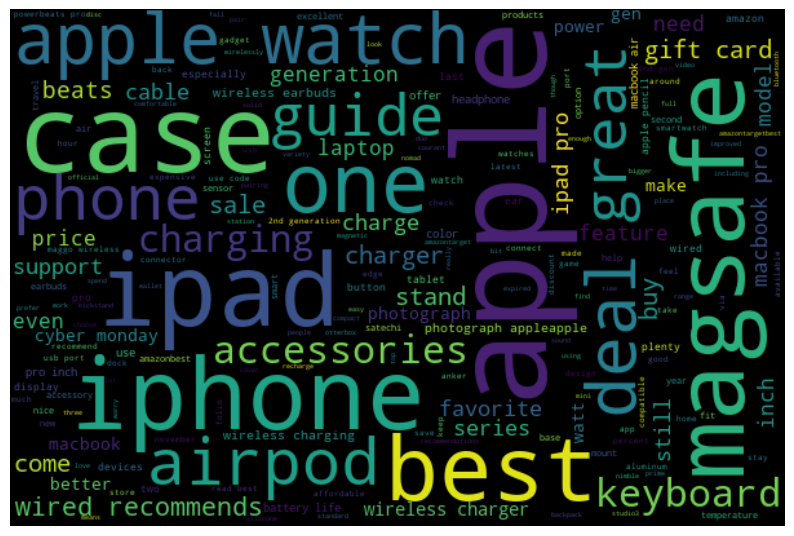

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

### Häufigkeitsverteilung

In [ ]:
# Paket herunterladen
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/katharina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# Wörter tokenisieren:
words_tokens = nltk.word_tokenize(all_words)

In [ ]:
# Verwenden der Funktion FreqDist und das Ergebnis als fd abspeichern
fd = FreqDist(words_tokens)

In [ ]:
# Ausgabe von fd
fd

FreqDist({'apple': 79, 'ipad': 36, 'pro': 36, 'wireless': 30, 'magsafe': 29, 'iphone': 28, 'best': 28, 'watch': 25, 'case': 22, 'charging': 21, ...})

### Die häufigsten Wörter ermitteln 

Wir wollen herausfinden, welche die 3 häufigsten Wörter sind, die im Artikel vorkommen. Dafür verwendet man die Funktion .most_common

In [ ]:
top_3 = fd.most_common(n=3)

Die 3 häufigsten Wörter als Tabelle anzeigen:

In [ ]:
fd.tabulate(3)

apple  ipad   pro 
   79    36    36 


In [ ]:
top_10 = fd.most_common(10)

top_10

[('apple', 79),
 ('ipad', 36),
 ('pro', 36),
 ('wireless', 30),
 ('magsafe', 29),
 ('iphone', 28),
 ('best', 28),
 ('watch', 25),
 ('case', 22),
 ('charging', 21)]

In [ ]:
df_dist = pd.DataFrame({"Häufigkeit": dict(top_10)})

df_dist

,Häufigkeit
apple,79
best,28
case,22
charging,21
ipad,36
iphone,28
magsafe,29
pro,36
watch,25
wireless,30


In [ ]:
df_dist.reset_index(inplace=True)

df_dist

,index,Häufigkeit
0,apple,79
1,best,28
2,case,22
3,charging,21
4,ipad,36
5,iphone,28
6,magsafe,29
7,pro,36
8,watch,25
9,wireless,30


In [ ]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("Häufigkeit"),
    y=alt.Y("index", sort="-x")
).interactive()

alt.Chart(...)